In [12]:
%load_ext autoreload
%autoreload 2
import Unit_5 as u5
import numpy as np
import sys
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize)  # to print total matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Entering Data
## And a preview of Entire data

[[ 0.00e+00  1.50e+07  1.80e+09  0.00e+00 -1.50e+07  1.80e+09]
 [-1.25e+06  0.00e+00  0.00e+00  1.25e+06  0.00e+00  0.00e+00]
 [ 0.00e+00  1.80e+09  2.88e+11  0.00e+00 -1.80e+09  1.44e+11]
 [ 0.00e+00 -1.50e+07 -1.80e+09  0.00e+00  1.50e+07 -1.80e+09]
 [ 1.25e+06  0.00e+00  0.00e+00 -1.25e+06  0.00e+00  0.00e+00]
 [ 0.00e+00  1.80e+09  1.44e+11  0.00e+00 -1.80e+09  2.88e+11]]


<function matplotlib.pyplot.show(close=None, block=None)>

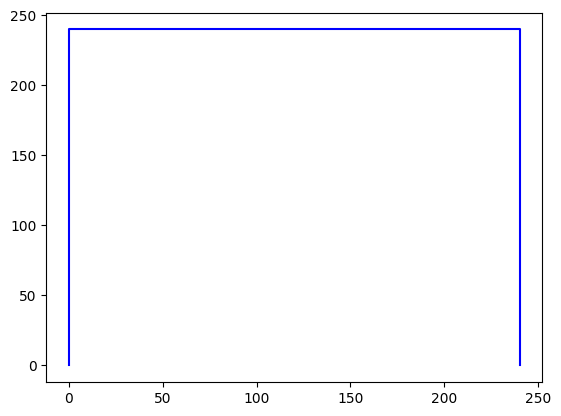

In [24]:
E = 30 * 10 ** 6  #lb/in^2
A = 10  #in^2
I1 = 200  #in^4
I2 = 200  #in^4
I3 = 200  #in^4
nodes = [0]
nodes.append(u5.Point(0, 20 * 12, number=1))
nodes.append(u5.Point(20 * 12, 20 * 12, number=2))
nodes.append(u5.Point(12 * 20, 0, number=3))
nodes.append(u5.Point(0, 0, number=4))
elements = []
elements.append(u5.Element(nodes[1], nodes[4], A=A, E=E, I=I1))
# elements.append(u5.Element(nodes[1], nodes[2], A=A, E=E, I=I2))
# elements.append(u5.Element(nodes[2], nodes[3], A=A, E=E, I=I3))

n_node_total = len(nodes) - 1

x = []
y = []
n1 = [4, 1, 2, 3]

n = [n1]

for i in range(len(n)):
    x.append(np.array([]))
    y.append(np.array([]))
    for j in n[i]:
        x[i] = np.append(x[i], nodes[j].x)
        y[i] = np.append(y[i], nodes[j].y)
    plt.plot(x[i], y[i], "b")

plt.show
# print(elements[0].K)

#### Step 1: make total K as "K"

In [14]:
n_dim_total = 3 * n_node_total
K = np.zeros(n_dim_total * n_dim_total)  # n*n total
K_help = u5.make_K_help(n_dim_total)  # n total
for i in range(0, len(elements)):
    K = elements[i].merge_K(K, K_help)
print(K.reshape(n_dim_total * n_dim_total))

[ 1.00416667e+01  0.00000000e+00  5.00000000e+00 -1.00000000e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.16666667e-02  0.00000000e+00  5.00000000e+00
  0.00000000e+00  1.00416667e+01  5.00000000e+00  0.00000000e+00
 -4.16666667e-02  5.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  5.00000000e+00  5.00000000e+00  1.60000000e+03  0.00000000e+00
 -5.00000000e+00  4.00000000e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.00000000e+00  0.00000000e+00  4.00000000e+02
 -1.00000000e+01  0.00000000e+00  0.00000000e+00  1.00416667e+01
  0.00000000e+00  5.00000000e+00 -4.16666667e-02  0.00000000e+00
  5.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.16666667e-02 -5.00000000e+00  0.00000000e+00
  1.00416667e+01 -5.00000000e+00  0.00000000e+00 -1.00000000e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.00000

#### Step 2: make modified K as "K_modified"
Enter Data

In [15]:
n_dim_mod = 6  # Enter modified dimension
row = 3
column = 3
K_modified = np.array([])
new_K_help = u5.make_K_help(n_dim_mod, row, column)  # show where is the modified K
for p, v in np.ndenumerate(K_help):
    if v in new_K_help:
        K_modified = np.append(K_modified, K[p])

K_modified = K_modified.reshape([n_dim_mod, n_dim_mod])  # shape the modified.
print(str(K_modified))

[[ 4.16666667e-02  0.00000000e+00 -5.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.00000000e+00  0.00000000e+00  8.00000000e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.16666667e-02
   0.00000000e+00 -5.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.00000000e+00
   0.00000000e+00  8.00000000e+02]]


### F = K*D
#### find displacements as "displacements"
Enter Data

In [16]:
K_modified_inv = np.linalg.inv(K_modified)
F = np.zeros(n_dim_mod)
F[0] = 5000
F_show = F.reshape((n_dim_mod, 1))
K_modified_inv_show = K_modified_inv.reshape((n_dim_mod, n_dim_mod))
displacements = np.dot(K_modified_inv_show, F_show)
displacements_show = displacements
print(displacements_show)

[[480000.]
 [     0.]
 [  3000.]
 [     0.]
 [     0.]
 [     0.]]


### F = K*D
#### make total displacements as "displacements_total"
#### find Forces as "F_total"

In [17]:
displacements_total = displacements
for i in range(n_dim_total - n_dim_mod):  # difference modified and total
    displacements_total = np.append(displacements_total, 0)
K = K.reshape([n_dim_total, n_dim_total])  # n*n total
displacements_total = displacements_total.reshape((n_dim_total, 1))
F_total = np.dot(K, displacements_total)
print(F_total)

[[ 4835000.]
 [   15000.]
 [ 7200000.]
 [-4800000.]
 [  -15000.]
 [ 1200000.]
 [       0.]
 [       0.]
 [       0.]
 [  -35000.]
 [       0.]
 [ 3600000.]]


# Plotting The Result

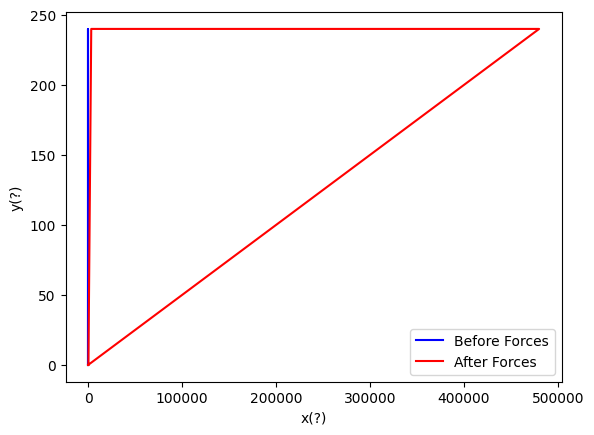

In [18]:
displacements_total_show = displacements_total.copy()
displacements_total_show *= 1

x1 = []
y1 = []
x2 = []
y2 = []
n1 = [4, 1, 2, 3]

n = [n1]

for i in range(len(n)):
    x1.append(np.array([]))
    y1.append(np.array([]))
    for j in n[i]:
        x1[i] = np.append(x1[i], nodes[j].x)
        y1[i] = np.append(y1[i], nodes[j].y)
    plt.plot(x1[i], y1[i], "b")

for i in range(len(n)):
    x2.append(np.array([]))
    y2.append(np.array([]))
    for j in n[i]:
        x2[i] = np.append(x2[i], nodes[j].x + displacements_total_show[(j - 1) * 2])
        y2[i] = np.append(y2[i], nodes[j].y + displacements_total_show[(j - 1) * 2 + 1])
    plt.plot(x2[i], y2[i], "r")

plt.plot(0, 0, "b", label="Before Forces")
plt.plot(0, 0, "r", label="After Forces")

plt.xlabel("x(?)")
plt.ylabel("y(?)")
plt.legend()
plt.show()